In [2]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
os.listdir()

['shuffle_sequences.sh',
 'metrics.py',
 'mini.sh',
 'Untitled1.ipynb',
 '.DS_Store',
 'Untitled.ipynb',
 '__pycache__',
 'altschulEriksonDinuclShuffle.py',
 'dataset.py',
 'utils.py',
 '.ipynb_checkpoints',
 'load_fasta.sh',
 'gen_shuf.sh',
 'training.py']

In [1]:
with open('../logs/transformer_xl_logs/logs.txt','r') as f:
    text = f.read()
text = text.split('\n')

In [6]:
metrics = pd.DataFrame()
keys = ['epoch','step','batches','lr','ms/batch','loss','bpc']
other_metrics = []
evals=[]
for line in text:
    if '|' in line:
        if 'Eval' in line:
            evals.append(line)
        else:
            splitted = re.split(r'[| ]', line)
            splitted = list(filter(None,splitted))
            splitted = list(filter(lambda x: x not in keys,splitted))
            #print(splitted)
            metrics = metrics.append([splitted])
    else:
        if not 'arning' in line and not '-' in line:
            other_metrics.append(line)
metrics.columns = keys
metrics = metrics.astype(float)
metrics.epoch = metrics.epoch.astype(int)
metrics.step = metrics.step.astype(int)
#metrics = metrics.set_index('step')
metrics

,epoch,step,batches,lr,ms/batch,loss,bpc
0,1,200,200.0,0.000007,718.55,0.378644,0.54627
0,2,400,123.0,0.000013,757.94,0.272170,0.39266
0,3,600,47.0,0.000020,764.10,0.117299,0.16923
0,3,800,247.0,0.000027,713.29,0.063066,0.09099
0,4,1000,169.0,0.000033,738.40,0.039101,0.05641
0,5,1200,90.0,0.000040,732.49,0.028049,0.04047
0,6,1400,12.0,0.000047,749.01,0.021268,0.03068
0,6,1600,212.0,0.000053,703.57,0.018733,0.02703
0,7,1800,130.0,0.000060,706.37,0.016752,0.02417
0,8,2000,52.0,0.000067,717.21,0.016038,0.02314


In [7]:
for i, m in enumerate(other_metrics):
    m = re.split(r'[ ,\[\]]',m)
    m = list(filter(None,m))
    other_metrics[i] = m
other_metrics = pd.DataFrame(other_metrics,columns = ['roc_auc1','roc_auc2','pr?1','pr?2']).astype(float)
other_metrics = other_metrics.reset_index()
other_metrics

,index,roc_auc1,roc_auc2,pr?1,pr?2
0,0,0.488597,0.488597,0.995854,0.003952
1,1,0.502365,0.502365,0.995965,0.004112
2,2,0.503178,0.503178,0.995934,0.004068
3,3,0.499005,0.499005,0.995899,0.004026
4,4,0.499280,0.499280,0.995969,0.004010
5,5,0.498705,0.498705,0.996005,0.003937
6,6,0.489020,0.489020,0.995830,0.003911
7,7,0.491257,0.491257,0.995895,0.003890
8,8,0.489173,0.489173,0.995863,0.003836
9,9,0.487467,0.487467,0.995807,0.003860


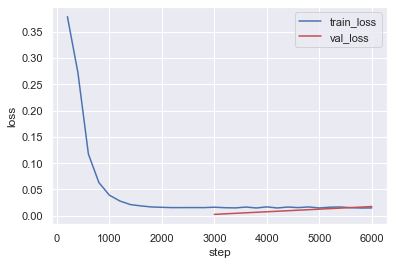

In [8]:
fig, ax = plt.subplots()

metrics.plot('step','loss',ax=ax,label='train_loss')
ax.plot([3000,6000],[0.002632 ,0.0175],'r',label='val_loss')
plt.ylabel('loss')
plt.legend()
plt.savefig('transformer_xl_losses.png')

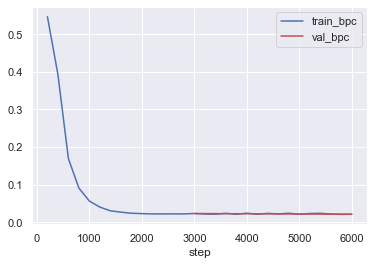

In [11]:
fig, ax = plt.subplots()

metrics.plot('step','bpc',ax=ax,label='train_bpc')
ax.plot([3000,6000],[0.02346,0.02148],'r',label='val_bpc')
plt.legend()